# Roches Point Weather
***

### Data Analysis
This is a data analysis for Roches Point wind speed record using Pandas Dataframe.

### Library

In [813]:
#Import required libraries

import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualisation and graphical plotting
import seaborn as sns  # built on top of matplotlib with similar functionalities
import numpy as np # for mathematical operations on arrays.
import datetime as dt


#### Load Data

In [814]:
# Load data and skip the first 17 rows.
df = pd.read_csv(r"C:\Users\phumi\OneDrive\Documents\hly1075\Roches Point Weather.csv", skiprows=17, low_memory=False)

# Display the first few rows
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


#### Examine the structure

In [815]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584831 entries, 0 to 584830
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    584831 non-null  object
 1   ind     584831 non-null  int64 
 2   rain    584831 non-null  object
 3   ind.1   584831 non-null  int64 
 4   temp    584831 non-null  object
 5   ind.2   584831 non-null  int64 
 6   wetb    584831 non-null  object
 7   dewpt   584831 non-null  object
 8   vappr   584831 non-null  object
 9   rhum    584831 non-null  object
 10  msl     584831 non-null  object
 11  ind.3   584831 non-null  int64 
 12  wdsp    584831 non-null  object
 13  ind.4   584831 non-null  int64 
 14  wddir   584831 non-null  object
dtypes: int64(5), object(10)
memory usage: 66.9+ MB


#### Change data type to floats.

`pandas.to_numeric`: Convert argument to a numeric type.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas-to-numeric

In [816]:
# Convert windspeed to floats
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [817]:
# Convert temperature to floats
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

### Statistical Analysis

In [818]:
# Display summary statistics for numerical columns
df.describe()

,ind,ind.1,temp,ind.2,ind.3,wdsp,ind.4
count,584831.000000,584831.000000,566109.000000,584831.000000,584831.000000,584498.000000,584831.000000
mean,0.359164,0.138985,10.268049,0.189511,1.037088,10.743835,1.038630
std,0.903212,0.728840,4.314803,0.845802,0.904438,7.613332,0.910449
min,-1.000000,0.000000,-6.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.500000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,10.400000,0.000000,1.000000,10.000000,1.000000
75%,0.000000,0.000000,13.500000,0.000000,2.000000,15.000000,2.000000
max,8.000000,4.000000,27.000000,6.000000,7.000000,62.000000,7.000000


### Cleaning Data

In [819]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [820]:
# Check for missing data.
df.isnull().sum()

date         0
ind          0
rain       330
ind.1        0
temp     18722
ind.2        0
wetb     26434
dewpt    26434
vappr    49543
rhum     49540
msl      32806
ind.3        0
wdsp       333
ind.4        0
wddir      575
dtype: int64

#### Remove missing values

In [821]:
# Drop null values.
df.dropna(inplace = True)


In [822]:
# Check if data is clean
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


Change 'date' column to `datetime`: 

`Datetime` is a function used to convert StringType to DateType or TimestampType.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [823]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_22120\4117001753.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_22120\4117001753.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1955-12-01 01:00:00
1        1955-12-01 02:00:00
2        1955-12-01 03:00:00
3        1955-12-01 04:00:00
4        1955-12-01 05:00:00
                 ...        
584826   2024-10-31 20:00:00
584827   2024-10-31 21:00:00
584828   2024-10-31 22:00:00
584829   2024-10-31 23:00:00
584830   2024-11-01 00:00:00
Name: date, Length: 528694, dtype: datetime64[ns]

### Set index to `datetime`.

`DatetimeIndex` is a fundamental object in Pandas for handling time series data, allowing for precise date and time indexing.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex

In [824]:
#
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
1955-12-01 01:00:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16.0,1,170
1955-12-01 02:00:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11.0,1,190
1955-12-01 03:00:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9.0,1,160


### WindSpeed Statistics

#### Resample

`dataframe.resample()`: convenience method for frequency conversion and resampling of time series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

### Monthly Statistics

In [861]:
# Calculate the monthly mean windspeed
df['monthly_meanwdsp'] = df['wdsp'].resample('ME').transform('mean')

# Calculate the monthly minimum windspeed
df['monthly_minwdsp'] = df['wdsp'].resample('ME').transform('min')

# Calculate the monthly maximum windspeed
df['monthly_maxwdsp'] = df['wdsp'].resample('ME').transform('max')

#### Yearly Statistics

In [862]:
# Calculate the yearly mean windspeed
df['yearly_meanwdsp'] = df['wdsp'].resample('YE').transform('mean')

# Calculate the monthly minimum windspeed
df['yearly_minwdsp'] = df['wdsp'].resample('YE').transform('min')

# Calculate the monthly maximum windspeed
df['yearly_maxwdsp'] = df['wdsp'].resample('YE').transform('max')

#### Plots for Windspeed Data

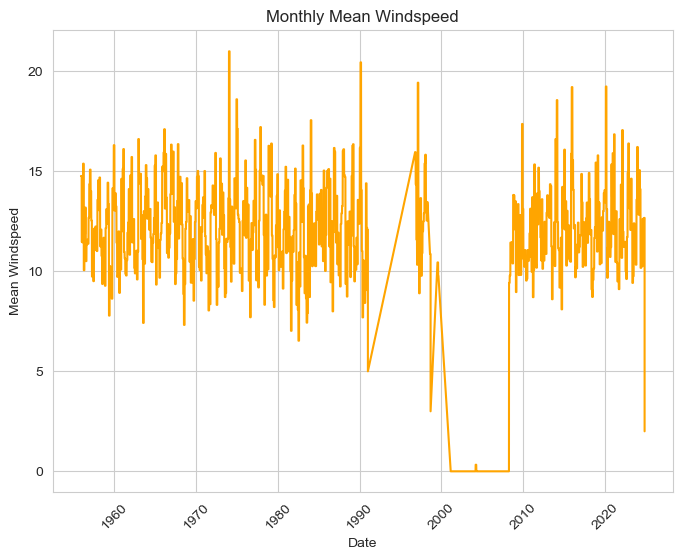

In [860]:
# Create a plot for monthly mean windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='monthly_meanwdsp', data=df, color='orange')
plt.title('Monthly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Windspeed')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_meanwdsp')

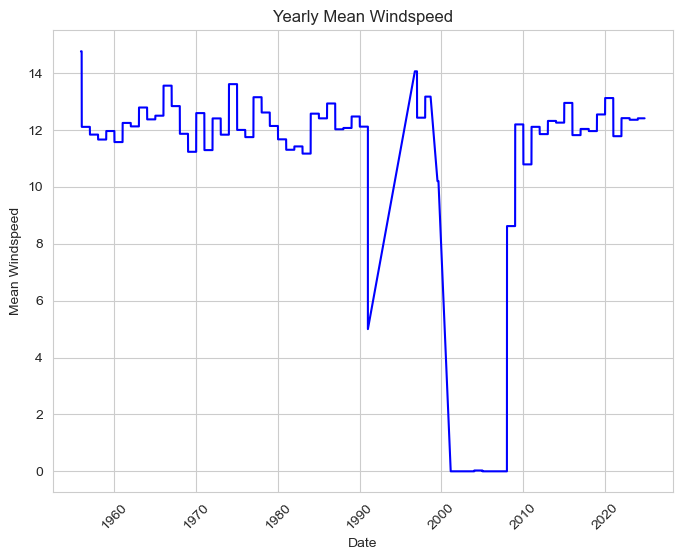

In [871]:
# Create a plot for yearly mean windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_meanwdsp', data=df, color='blue')
plt.title('Yearly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Windspeed')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/yearly_meanwdsp')

### Temperature Statistics

#### Monthly Statistics

In [874]:
# Calculate the monthly mean windspeed
df['monthly_meantemp'] = df['temp'].resample('ME').transform('mean')

# Calculate the monthly minimum windspeed
df['monthly_mintemp'] = df['temp'].resample('ME').transform('min')

# Calculate the monthly maximum windspeed
df['monthly_maxtemp'] = df['temp'].resample('ME').transform('max')

#### Yearly Statistics

In [876]:
 #Calculate the yearly mean windspeed
df['yearly_meantemp'] = df['wdsp'].resample('YE').transform('mean')

# Calculate the monthly minimum windspeed
df['yearly_mintemp'] = df['temp'].resample('YE').transform('min')

# Calculate the monthly maximum windspeed
df['yearly_maxtemp'] = df['temp'].resample('YE').transform('max')

#### Plots for Temperature Data

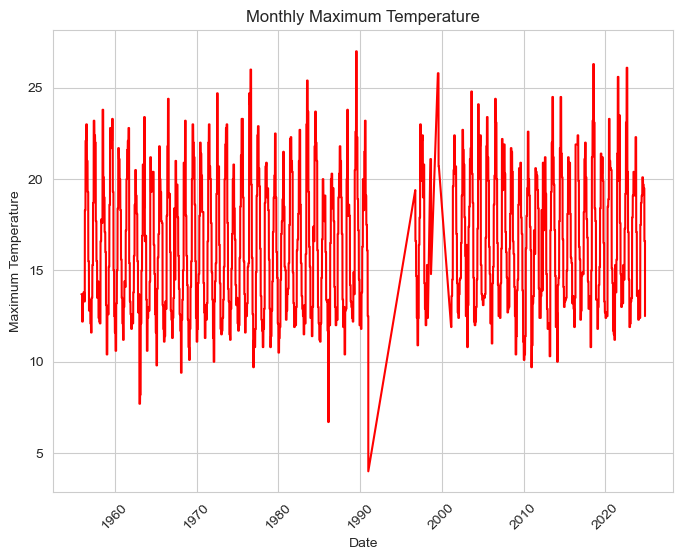

In [877]:
# Create a plot for monthly maximum temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='monthly_maxtemp', data=df, color='red')
plt.title('Monthly Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_maxtemp')

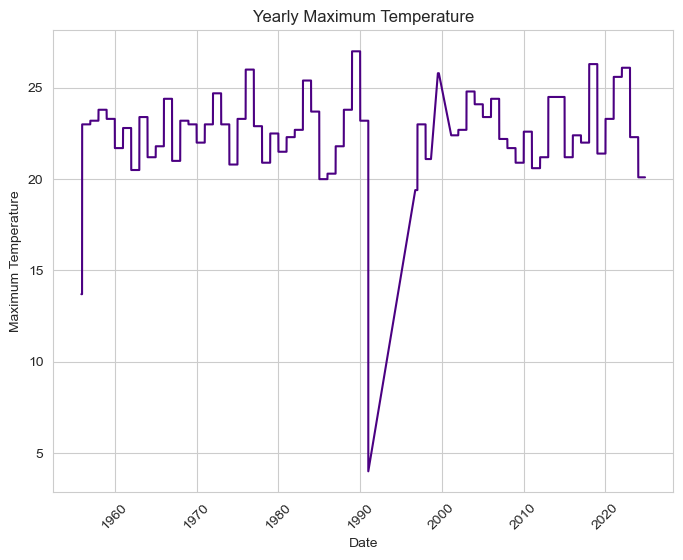

In [882]:
# Create a plot for yearly maximum temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_maxtemp', data=df, color='indigo')
plt.title('Yearly Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/yearly_maxtemp')

### Distribution of Temperature and Windspeed.


Line Chart

### Correlation

In [889]:
Correlation_matrix = df[['monthly_meanwdsp', 'monthly_meantemp', 'yearly_mintemp', 'yearly_maxwdsp']].corr()
Correlation_matrix

,monthly_meanwdsp,monthly_meantemp,yearly_mintemp,yearly_maxwdsp
monthly_meanwdsp,1.000000,-0.283415,-0.112725,0.818633
monthly_meantemp,-0.283415,1.000000,0.091823,-0.045248
yearly_mintemp,-0.112725,0.091823,1.000000,-0.082330
yearly_maxwdsp,0.818633,-0.045248,-0.082330,1.000000


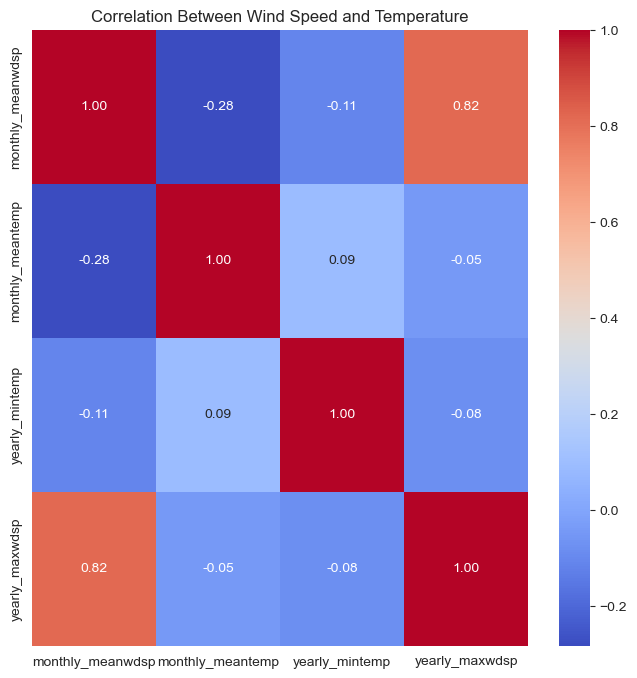

In [895]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 8))

sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Wind Speed and Temperature')
plt.savefig('img/correlation_matrix')

### Regression

In [ ]:
#Calculate average temperature and windspeed daily.

df['meantemp'] = df['temp'].resample('D').transform('mean')

df['meanwdsp'] = df['wdsp'].resample('D').transform('mean')


<Figure size 1000x1000 with 0 Axes>

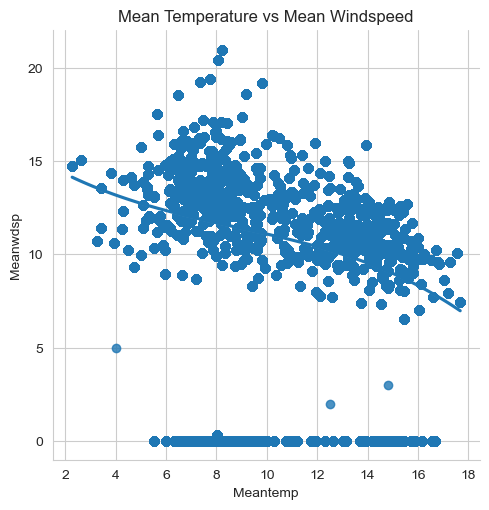

In [901]:
# Create a plot for mean temperature and mean windspeed

plt.figure(figsize=(10, 10))
sns.set_style('whitegrid') 
sns.lmplot(x='monthly_meantemp', y='monthly_meanwdsp', data=df, order=3)

plt.title('Mean Temperature vs Mean Windspeed')
plt.xlabel('Mean Temp')
plt.ylabel('Mean Windspeed')
plt.savefig('img/meantemp_vs_meanwdsp')




`The groupby()` function allows you to group your data and execute functions on these groups.

https://www.w3schools.com/python/pandas/ref_df_groupby.asp

In [591]:
#df.groupby('temp').min()
#df.groupby('temp').max()

### End